Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# $K$-Nearest Neighbor Regression: Problem solving

In this session, we will look at another dataset, `mpg`, that examines the performance of cars from the 1970s.
The variables in it are:

| Variable | Description                              |
|----------|:------------------------------------------|
| mpg      | Miles/(US) gallon                        |
| cyl      | Number of cylinders                      |
| disp     | Displacement (cu.in.)                    |
| hp       | Gross horsepower                         |
| drat     | Rear axle ratio                          |
| wt       | Weight (1000 lbs)                        |
| qsec     | 1/4 mile time                            |
| vs       | Engine (0 = V-shaped, 1 = straight)      |
| am       | Transmission (0 = automatic, 1 = manual) |
| gear     | Number of forward gears                  |
| carb     | Number of carburetors                    | 
| **name**     | **Name of car model**|

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

The last variable, `name` is not data but rather an ID.

For this session, we are interested in predicting `mpg`.

**QUESTION:**

What makes name an ID?

**ANSWER: (click here to edit)**

*`name` is different for every datapoint; no two rows have the same name.*

## Load the data

Start by loading `readr` and `dplyr`.

In [1]:
library(readr)
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load a dataframe with `"datasets/mpg-nona.csv"`.

In [2]:
dataframe = readr::read_csv("datasets/mpg-nona.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="54" y="256"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/mpg-nona.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="36" y="351"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 392 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (8): mpg, cylinders, displacement, horsepower, weight, acceleration, mod...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
27,4,140,86,2790,15.6,82,1,ford mustang gl
44,4,97,52,2130,24.6,82,2,vw pickup
32,4,135,84,2295,11.6,82,1,dodge rampage


**QUESTION:**

Is it a problem to keep `name` as a variable?

**ANSWER: (click here to edit)**

*KNN will not be able to calculate the distance between names, and will throw an error*

## Prepare train/test sets

Load `rsample`.

In [3]:
library(rsample)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable></variables><block type="import_R" id="g^doBJYp/fk!)^uuYnUf" x="-280" y="10"><field name="libraryName" id="~~-I(f=60)#JfKGvV_AP">rsample</field></block></xml>

Warning message:
“package ‘rsample’ was built under R version 4.2.2”


Split the data.

In [4]:
data_split = rsample::initial_split(dataframe,prop=.80)
data_train = rsample::training(data_split)
data_test = rsample::testing(data_split)

data_train

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="bQ!4E:J!~]0(]7KV]m@=">data_split</variable><variable id=":iMr},W7(N7vSLAUw!ao">data_train</variable><variable id="~~-I(f=60)#JfKGvV_AP">rsample</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="s!g),aa^(]dox/f`@P!y" x="-116" y="313"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field><value name="VALUE"><block type="varDoMethod_R" id="hPsr6}9C/VNgaLsKuR,o"><mutation items="2"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">initial_split</field><data>rsample:initial_split</data><value name="ADD0"><block type="variables_get" id="]~#@ltf];dTom_%pzV4n"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="R`?vH79hsA6Duxa9)AFX"><field name="CODE">prop=.80</field></block></value></block></value><next><block type="variables_set" id="3J6#JDFV0wE?V;NuM=?L"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field><value name="VALUE"><block type="varDoMethod_R" id="X|Q7lj,pD_9W{%^.xd7h"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">training</field><data>rsample:training</data><value name="ADD0"><block type="variables_get" id="JFCmHyJPiN`qwnlE~:iT"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value><next><block type="variables_set" id="Y]ag(g~}tkN6:_X*]6P{"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field><value name="VALUE"><block type="varDoMethod_R" id="WBYo8G|ZcojJAqETRnv`"><mutation items="1"></mutation><field name="VAR" id="~~-I(f=60)#JfKGvV_AP">rsample</field><field name="MEMBER">testing</field><data>rsample:testing</data><value name="ADD0"><block type="variables_get" id="p^~x9|Zj((6qaUVvj#.E"><field name="VAR" id="bQ!4E:J!~]0(]7KV]m@=">data_split</field></block></value></block></value></block></next></block></next></block><block type="variables_get" id="9j){6[r67+7OFx`a~K[Y" x="-115" y="515"><field name="VAR" id=":iMr},W7(N7vSLAUw!ao">data_train</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
36.1,4,91,60,1800,16.4,78,3,honda civic cvcc
16.0,8,304,150,3433,12.0,70,1,amc rebel sst
21.0,6,231,110,3039,15.0,75,1,buick skyhawk
39.1,4,79,58,1755,16.9,81,3,toyota starlet
16.0,8,400,230,4278,9.5,73,1,pontiac grand prix
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,4,97,78,1940,14.5,77,2,volkswagen rabbit custom
12,8,383,180,4955,11.5,71,1,dodge monaco (sw)
23,4,120,97,2506,14.5,72,3,toyouta corona mark ii (sw)


## KNN regression model

Load the libraries you need:

- `library recipes`
- `library workflows`
- `library parsnip`
- `library generics`

In [5]:
library(recipes)
library(workflows)
library(generics)
library(parsnip)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable></variables><block type="import_R" id="EGE;dT.cnN,o}Y[99#Qb" x="-12" y="8"><field name="libraryName" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><next><block type="import_R" id="6DrE-26ByLD$vC}QeW:}"><field name="libraryName" id="haMDnc8Uj|EjY^608!;]">workflows</field><next><block type="import_R" id="hQ4(=]9%QB3(VWqs9OK:"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><next><block type="import_R" id="d1vIIBH:{ygkVLV/Ts5l"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field></block></next></block></next></block></next></block></xml>

Warning message:
“package ‘recipes’ was built under R version 4.2.2”

Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘workflows’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union


Warning message:
“package ‘parsnip’ was built under R version 4.2.2”


Create a workflow with a scaler/normalization and KNN regression to predict `mpg`.
Remember we need the scaler to put all our variables on the same scale.
We also need to tell the workflow to ignore `name`.
We can do this by adding another step to the recipe, `update_role(name,  new_role = "ID")`.
By default, everything will be treated as a predictor unless we assign a special role, here called "ID".

In [6]:
recipe = recipes::recipe(mpg ~ .,data = data_train) %>%
    recipes::step_normalize(recipes::all_numeric_predictors()) %>%
    recipes::update_role(name,new_role = "ID")
model = parsnip::nearest_neighbor(neighbors = 10) %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("kknn")
workflow = workflows::workflow() %>%
    workflows::add_model(model) %>%
    workflows::add_recipe(recipe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="Oz8-33unXZJ?3~@*32r-">recipe</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="v7B~eW}{zV,n~iX:qTJ-">recipes</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable></variables><block type="variables_set" id="w{}j6,P|-6Qepjtz/mj{" x="67" y="169"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field><value name="VALUE"><block type="pipe_R" id="uzp8+LCnH{r`1Xn%3mdK"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="U^,K1TWD+}odaY!kExkh"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">recipe</field><data>recipes:recipe</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">mpg ~ .</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = data_train</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="5=08G^e872=?+){KI?5}"><mutation items="1"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">step_normalize</field><data>recipes:step_normalize</data><value name="ADD0"><block type="varDoMethod_R" id="4GS=rm//,9|E^?oX.CVv"><mutation items="0"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">all_numeric_predictors</field><data>recipes:all_numeric_predictors</data></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="*]~ViuqJaRfbs{OY-biF"><mutation items="2"></mutation><field name="VAR" id="v7B~eW}{zV,n~iX:qTJ-">recipes</field><field name="MEMBER">update_role</field><data>recipes:update_role</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="a`iX6hIbKP2vt:Zd;]iL"><field name="CODE">name</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="u40kq-9,XUZ._2FXvW?/"><field name="CODE"> new_role = "ID"</field></block></value></block></value></block></value><next><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">nearest_neighbor</field><data>parsnip:nearest_neighbor</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="m*FRi~byi7Ob_,Q%6]=$"><field name="CODE">neighbors = 10</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">kknn</field></block></value></block></value></block></value><next><block type="variables_set" id="f%c#[D)Zv:uHH6WY_TQI"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Rk~*~r(!3iF+cvcz7IiD"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="H!7?PcsriTx,;-jJmb`7"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">workflow</field><data>workflows:workflow</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="CrWn^(|[{],FV=/-Jt!b"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_model</field><data>workflows:add_model</data><value name="ADD0"><block type="variables_get" id="7MGIpZZh#XkK`d+ZY4h:"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="L1.O)ZR~Ab`VSER(L}FZ"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">add_recipe</field><data>workflows:add_recipe</data><value name="ADD0"><block type="variables_get" id="U.@@S3Rdx{:xKxE[Fsx]"><field name="VAR" id="Oz8-33unXZJ?3~@*32r-">recipe</field></block></value></block></value></block></value></block></next></block></next></block></xml>

Train the KNN regression model using the workflow (i.e. use `fit`).

In [7]:
trained_model = generics::fit(workflow,data = data_train)

trained_model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable></variables><block type="variables_set" id="6F5Ls%m;fDN%1P.HL;~b" x="71" y="186"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="jAjgrG@)Vv]=~@dnuh7H"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="KB;+aD=xFzgUg0(`:xP:"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="siA`Xs!U2c1Ww}6ggh90"><field name="CODE">data = data_train</field></block></value></block></value></block><block type="variables_get" id="qJ0nFc9Y6f9.~_a8X@r6" x="76" y="309"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></xml>

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(10,     data, 5))

Type of response variable: continuous
minimal mean absolute error: 2.030262
Minimal mean squared error: 8.539198
Best kernel: optimal
Best k: 10

Predict the mpg using the test data.

In [8]:
data_evaluation = generics::augment(trained_model,data_test)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable></variables><block type="variables_set" id="qHR/^ulVJ-n)W4{:7-@Y" x="-193" y="204"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="k:ygkKz,swERp]34_uH{"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="9A!7aBLNe1]IufZ-R;BY"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="qPW(v;lbSJ=RJ)y;hW$)"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value></block><block type="variables_get" id="Um|1+kaS%|p}e=,Pw)MQ" x="-203" y="317"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,.pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,16.14791
15,8,400,150,3761,9.5,70,1,chevrolet monte carlo,15.25593
14,8,455,225,3086,10.0,70,1,buick estate wagon (sw),14.37429
22,6,198,95,2833,15.5,70,1,plymouth duster,18.70965
21,6,200,85,2587,16.0,70,1,ford maverick,19.58658
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
38,4,91,67,1965,15.0,82,3,honda civic,34.77189
32,4,144,96,2665,13.9,82,3,toyota celica gt,33.39336
36,4,135,84,2370,13.0,82,1,dodge charger 2.2,30.63512


## Assessing the model

Load `yardstick`.

In [9]:
library(yardstick)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="import_R" id="~]m5/PaJhO^)r2YX)!Ko" x="-152" y="-34"><field name="libraryName" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field></block></xml>

For binary classification, the first factor level is assumed to be the event.
Use the argument `event_level = "second"` to alter this as needed.


Attaching package: ‘yardstick’


The following object is masked from ‘package:generics’:

    accuracy


The following object is masked from ‘package:readr’:

    spec




Calculate the metrics, including RMSE, for the predictions.

In [10]:
yardstick::metrics(data_evaluation,truth=mpg,estimate=.pred)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="varDoMethod_R" id="ovJDL$T;GrTBZ,)jMz;a" x="-272" y="142"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="$#GYCvI1LKXt%Rsb09a}"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="i#@XFD{vr]B47yD52|(B"><field name="CODE">truth=mpg</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="(x50a~#{oijRotT|Z?8G"><field name="CODE">estimate=.pred</field></block></value></block></xml>

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,2.8818264
rsq,standard,0.8443304
mae,standard,2.0826545


**QUESTION:**

What was your rmse?
If you redo your splits and retrain the model, does it change?
Why?

**ANSWER: (click here to edit)**

*2.57 ; it changes every time; it changes because the splits give us different data each time and sometimes the train/test are more similar, by chance, which makes the rmse lower/better*

## Finding the optimal K

Find the optimal K for the model by trying K=1, 10, 25, 50, 100, and 250 in a loop (copy your code from the other notebook).

In [11]:
for (j in list(1, 10, 25, 50, 100, 250)) {
  workflow = workflow %>%
      workflows::update_model(model %>%
      parsnip::set_args(neighbors= j))
  trained_model = generics::fit(workflow,data = data_train)
  data_evaluation_temp = generics::augment(trained_model,data_test)
  print(paste0(toString("K="), toString(j)));
  print(yardstick::metrics(data_evaluation_temp,truth=mpg,estimate=.pred));
}

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C{Fh{Pr:8%2lD{EV*aTX">j</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="2!lGc/1qa(~}v[2[/m/,">data_evaluation_temp</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable></variables><block type="controls_forEach" id="b(kJGMv$w7V.3_Zvqv~b" x="-219" y="45"><field name="VAR" id="C{Fh{Pr:8%2lD{EV*aTX">j</field><value name="LIST"><block type="lists_create_with" id="iKr$=Gh)[))VoiCU,V;^"><mutation items="6"></mutation><value name="ADD0"><block type="math_number" id="Fpu*BNZtIa;g-WSSCcB["><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id="b_0$;Mb7~rGZ*I,U%3y9"><field name="NUM">10</field></block></value><value name="ADD2"><block type="math_number" id="N1O4=j6HxgyLQor6aHXx"><field name="NUM">25</field></block></value><value name="ADD3"><block type="math_number" id="),Ae7.D4QUa|;T_JAi|W"><field name="NUM">50</field></block></value><value name="ADD4"><block type="math_number" id="RMK~VIcaw|p?C)AZuSm|"><field name="NUM">100</field></block></value><value name="ADD5"><block type="math_number" id="lJb?HXW/xn)(=$Gz$P%`"><field name="NUM">250</field></block></value></block></value><statement name="DO"><block type="variables_set" id="iAXV:^yL4/lXHXq9-fWq"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Oc60%_2o@.oLe%Y#3?BI"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="DLhYW=bspAQ$a:^k%4!`"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="uerg~4,OSsOP%Q_GMx!W"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">update_model</field><data>workflows:update_model</data><value name="ADD0"><block type="pipe_R" id="dK6uw^Hhg9CGa{i{SQ~^"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="5ov`s@{`nDAa=Wa:Vf#6"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id=":WqVq}BLn3,_t/G*_.cZ"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_args</field><data>parsnip:set_args</data><value name="ADD0"><block type="valueOutputCodeBlock_R" id=",Tuj|s}2Ud/1bxaP{a~@"><field name="CODE">neighbors=</field><value name="INPUT"><block type="variables_get" id="FG%1o+Wf5p`Jasul%]Ez"><field name="VAR" id="C{Fh{Pr:8%2lD{EV*aTX">j</field></block></value></block></value></block></value></block></value></block></value></block></value><next><block type="variables_set" id="JYRrWzO%n`MVx/]/0-U="><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="G;Ti7zT)NN:K~,?6G@Sc"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="UQ+4F`M!L]%Rl`2JZ/|*"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="qT3l1#t])/i6SVL5ySZ;"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="z/]sC~wH!VR}a(%+(PXm"><field name="VAR" id="2!lGc/1qa(~}v[2[/m/,">data_evaluation_temp</field><value name="VALUE"><block type="varDoMethod_R" id="|[aMty9a1zM-r38ib2SG"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="spXY}_4LmBl=DPjUyHvP"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="oBn[u]Jcbrr|y;Gqk%`v"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value><next><block type="text_print" id="?5]Sz%tZbhlO{*__5I3E"><value name="TEXT"><shadow type="text" id="b^jyiP0V}I8+Bh~n9==c"><field name="TEXT">abc</field></shadow><block type="text_join" id="~WmOZ~o9VV1VF(m[0w$X"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="6wUqIxpN!j:_uZPqqaC8"><field name="TEXT">K=</field></block></value><value name="ADD1"><block type="variables_get" id="qe#`L$DT.K}f*?;dM/IH"><field name="VAR" id="C{Fh{Pr:8%2lD{EV*aTX">j</field></block></value></block></value><next><block type="text_print" id="O/FKS)E93R9.OIJCf:I6"><value name="TEXT"><shadow type="text" id="qpafGqI$G[k?+izt2:QF"><field name="TEXT">abc</field></shadow><block type="varDoMethod_R" id="6OvWcYG=VK?91j*_KfQX"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="P+GF$-)19]gmQ~=ceT/B"><field name="VAR" id="2!lGc/1qa(~}v[2[/m/,">data_evaluation_temp</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="uoTYO14$guR)nl-~uo,N"><field name="CODE">truth=mpg</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="u*MtZc0P_A]NotBQ*rxu"><field name="CODE">estimate=.pred</field></block></value></block></value></block></next></block></next></block></next></block></next></block></statement></block></xml>

[1] "K=1"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       3.87 
2 rsq     standard       0.747
3 mae     standard       2.72 
[1] "K=10"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       2.88 
2 rsq     standard       0.844
3 mae     standard       2.08 
[1] "K=25"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       2.99 
2 rsq     standard       0.832
3 mae     standard       2.12 
[1] "K=50"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       3.05 
2 rsq     standard       0.825
3 mae     standard       2.15 
[1] "K=100"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       3.28 
2 rsq     standard       0.802
3 mae     standard       2.29 
[1] "K=250"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>    

**QUESTION:**

What was your optimal K?

**ANSWER: (click here to edit)**

*10*

## Plot the predictions for different values of K

**This is very challenging and you might not finish!**

First load `ggplot2`.

In [12]:
library(ggplot2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="import_R" id="@9?M*+b6B@/~}k%NMv50" x="-52" y="-24"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”


Copy your loop above and paste it below.

Then copy your plot blocks from the last session (where you plotted both data and predictions) and put it inside the loop (adding below the last statement in the loop).
You will need to use a `print` block, i.e. `print` `make plot`... to do this.

For your `x=` variable, use `acceleration`.

**Be careful with copy/paste errors - you will need to rename your variables to match `mpg`.**

[1] "K=1"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       3.87 
2 rsq     standard       0.747
3 mae     standard       2.72 
[1] "K=10"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       2.88 
2 rsq     standard       0.844
3 mae     standard       2.08 


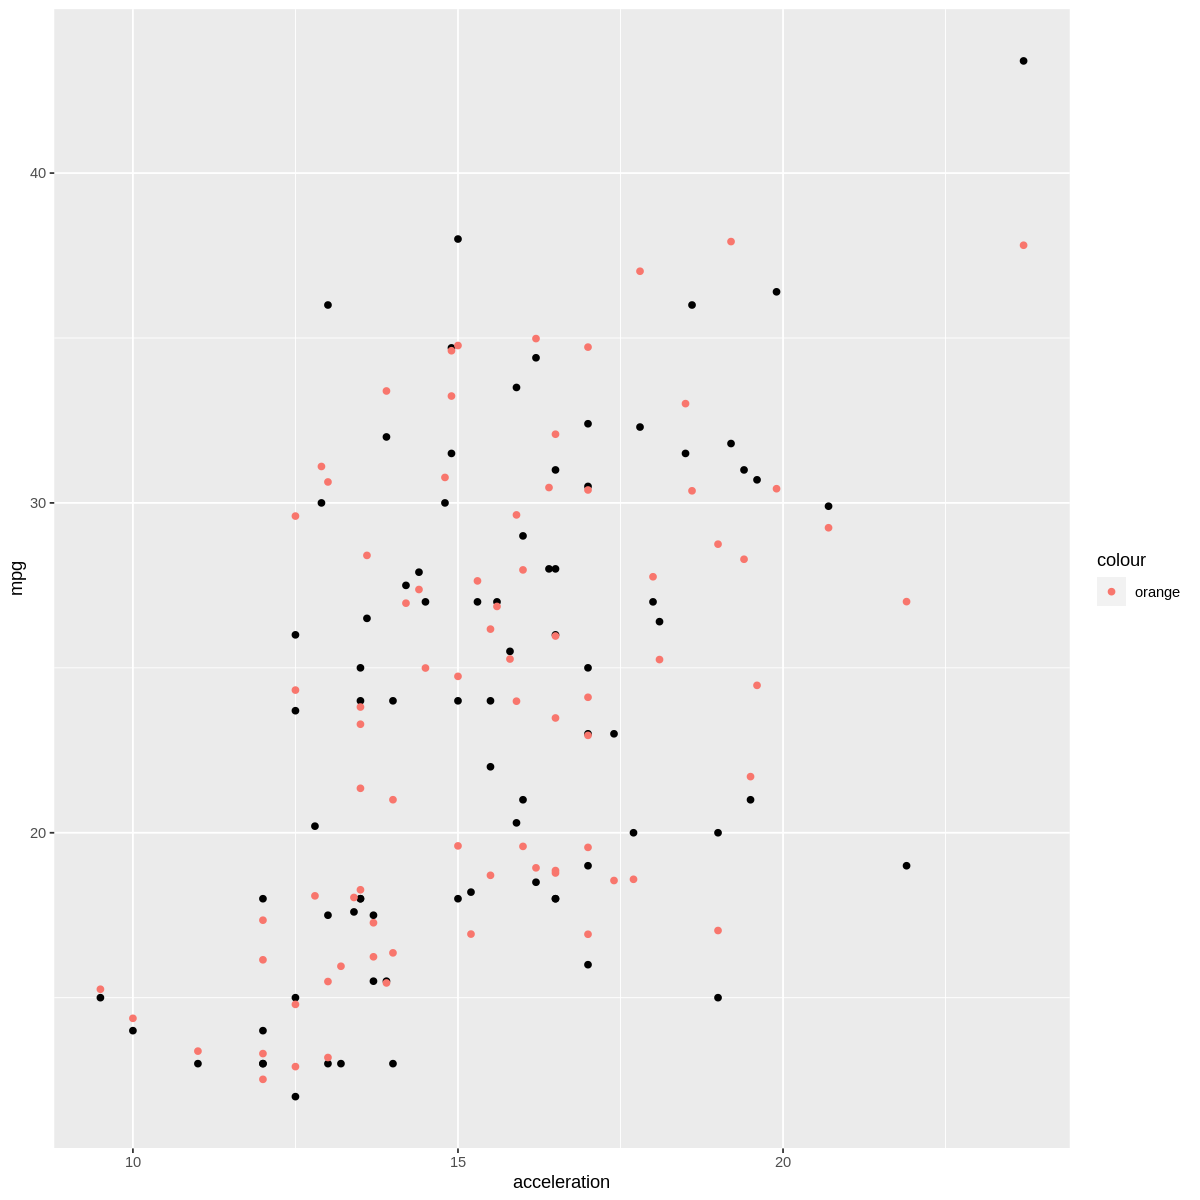

[1] "K=25"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       2.99 
2 rsq     standard       0.832
3 mae     standard       2.12 


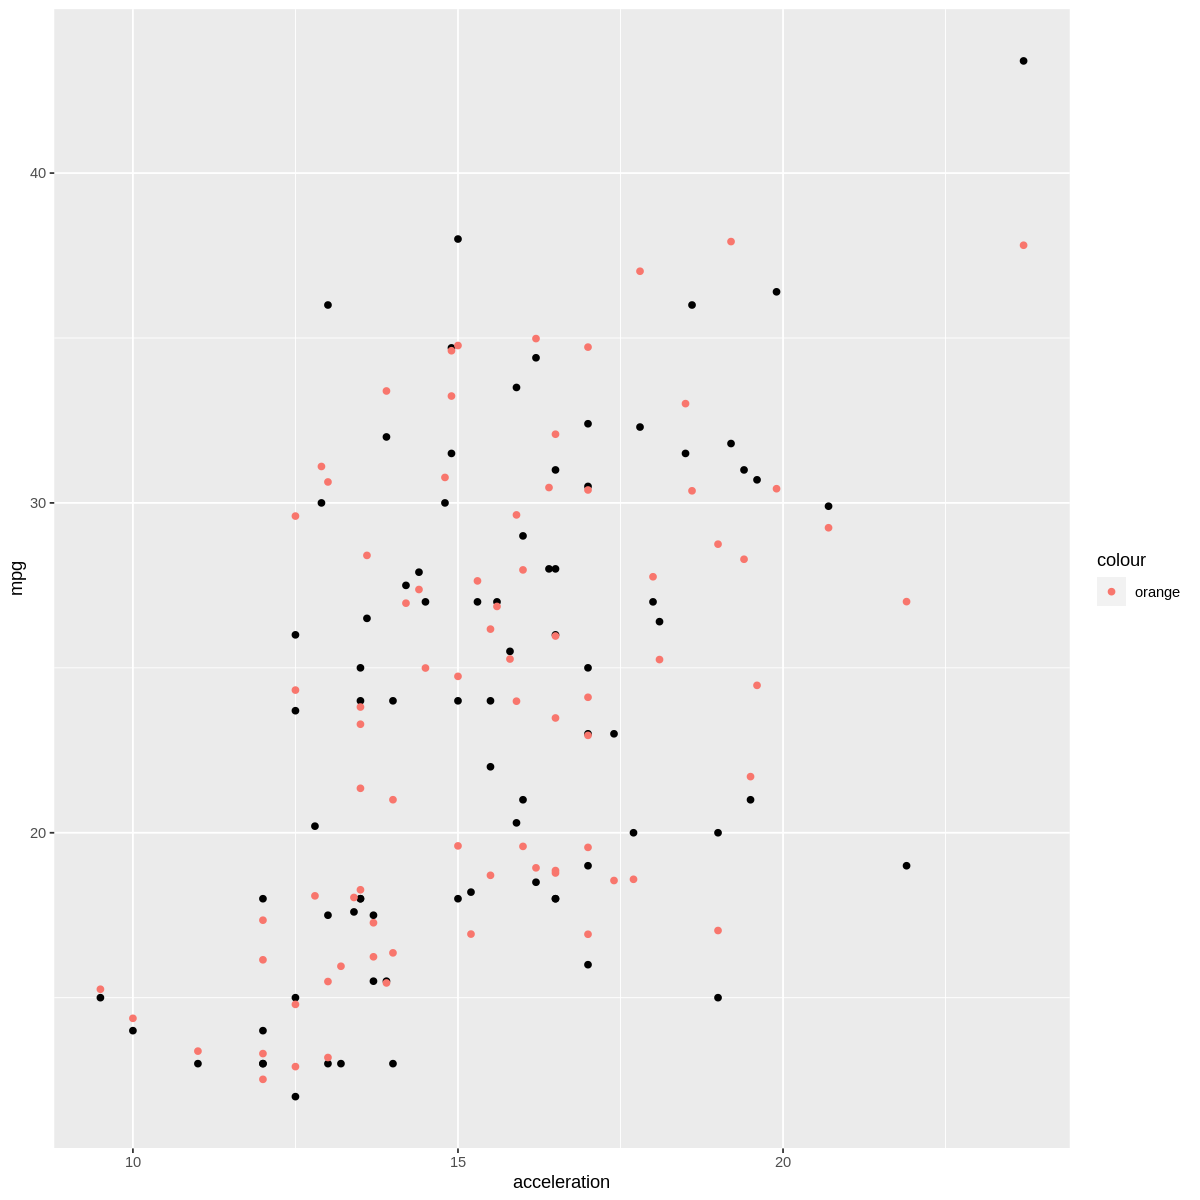

[1] "K=50"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       3.05 
2 rsq     standard       0.825
3 mae     standard       2.15 


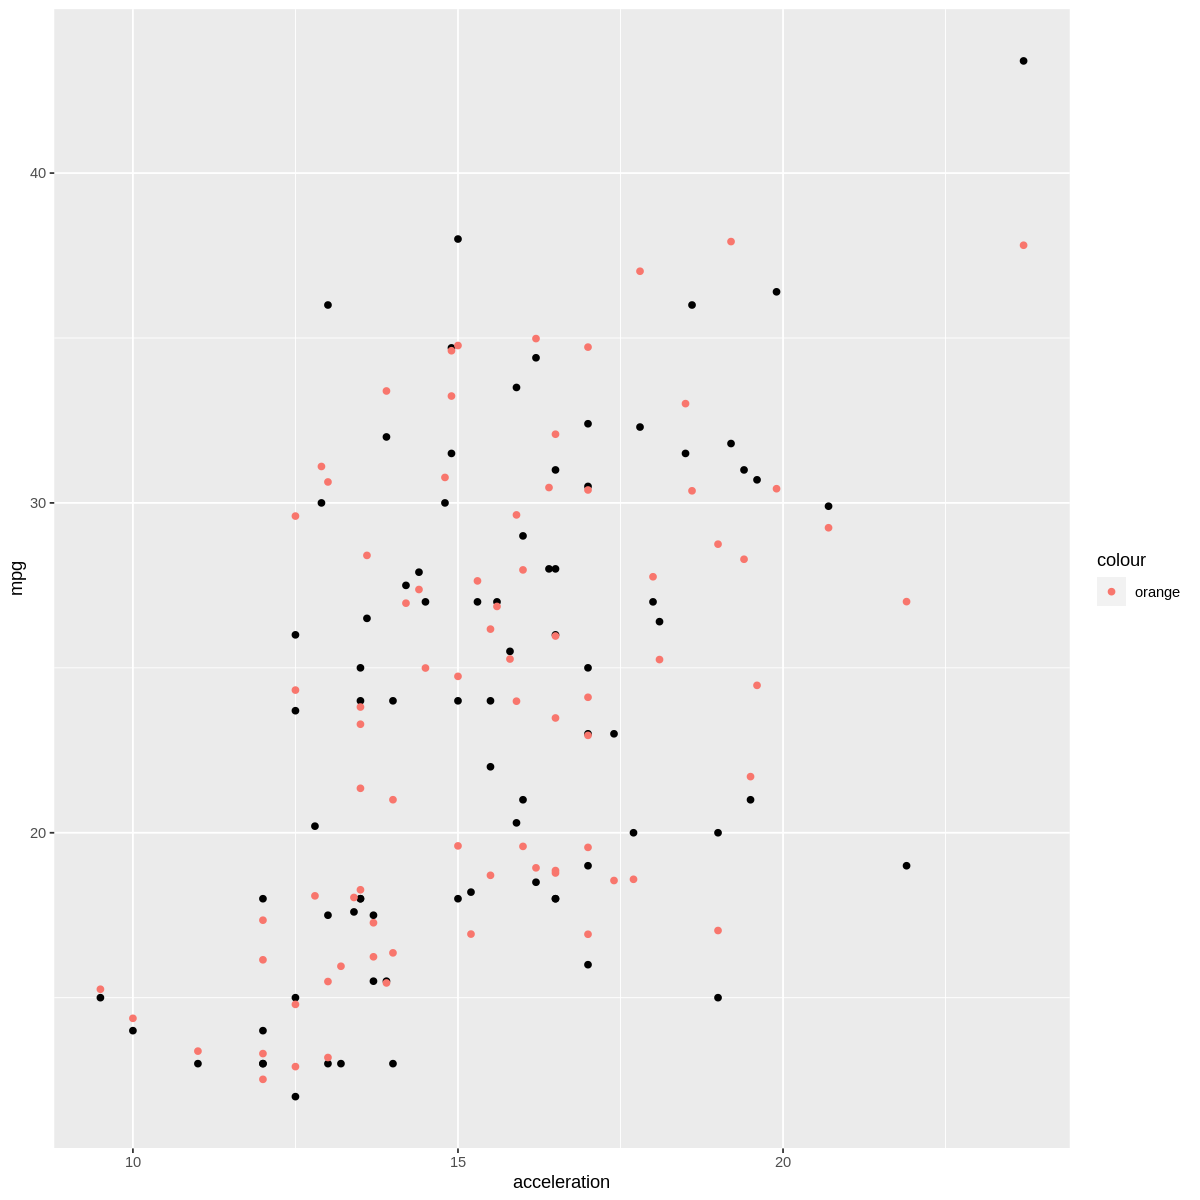

[1] "K=100"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       3.28 
2 rsq     standard       0.802
3 mae     standard       2.29 


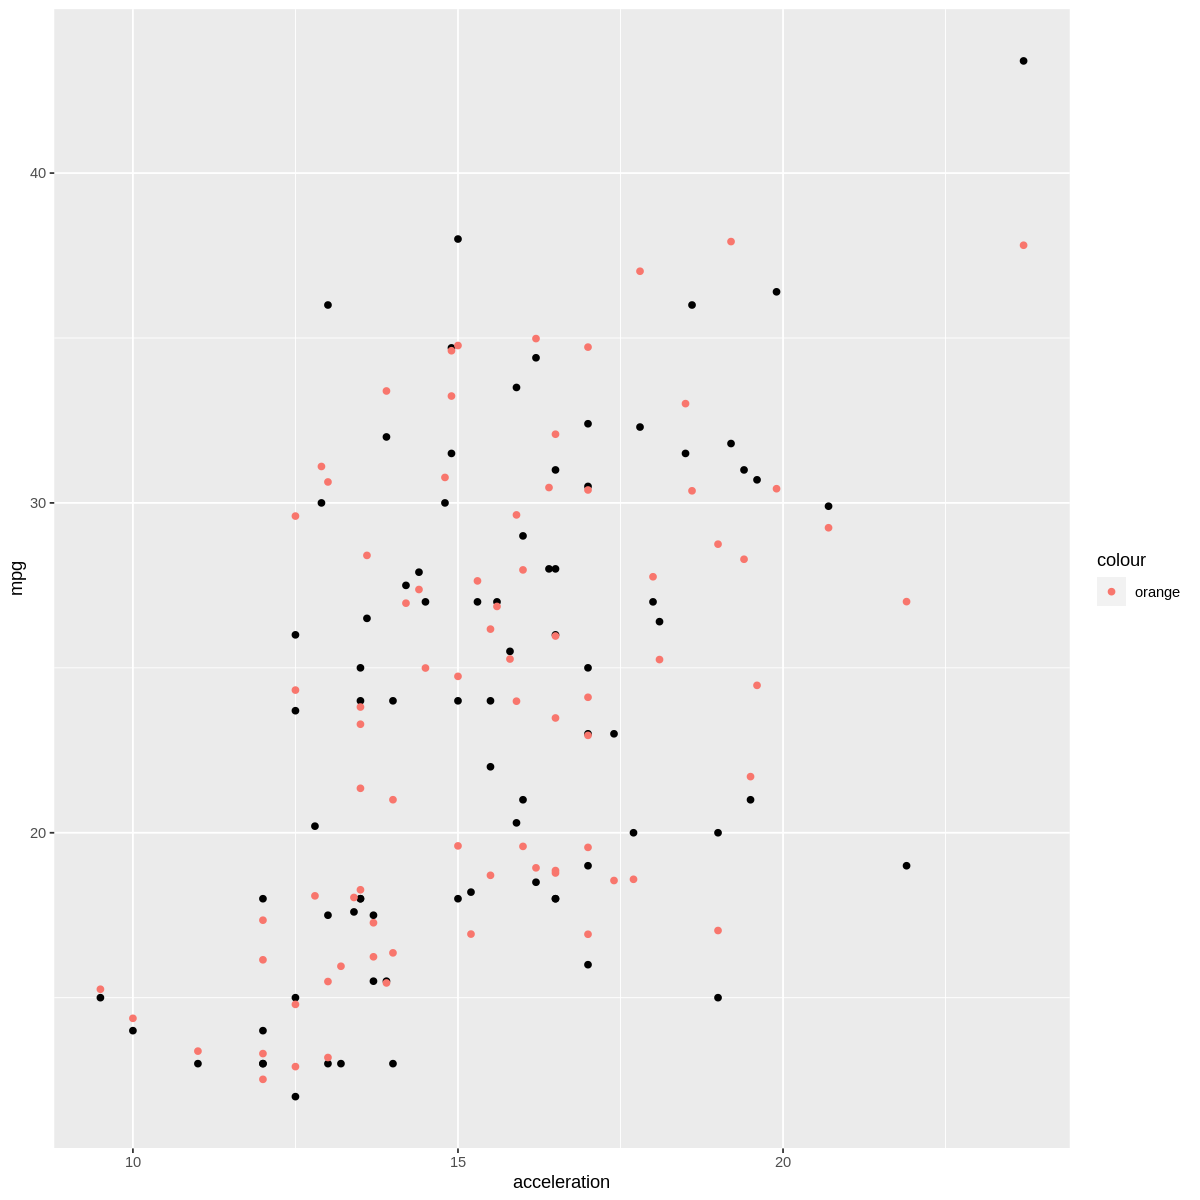

[1] "K=250"
# A tibble: 3 × 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 rmse    standard       4.05 
2 rsq     standard       0.756
3 mae     standard       3.10 


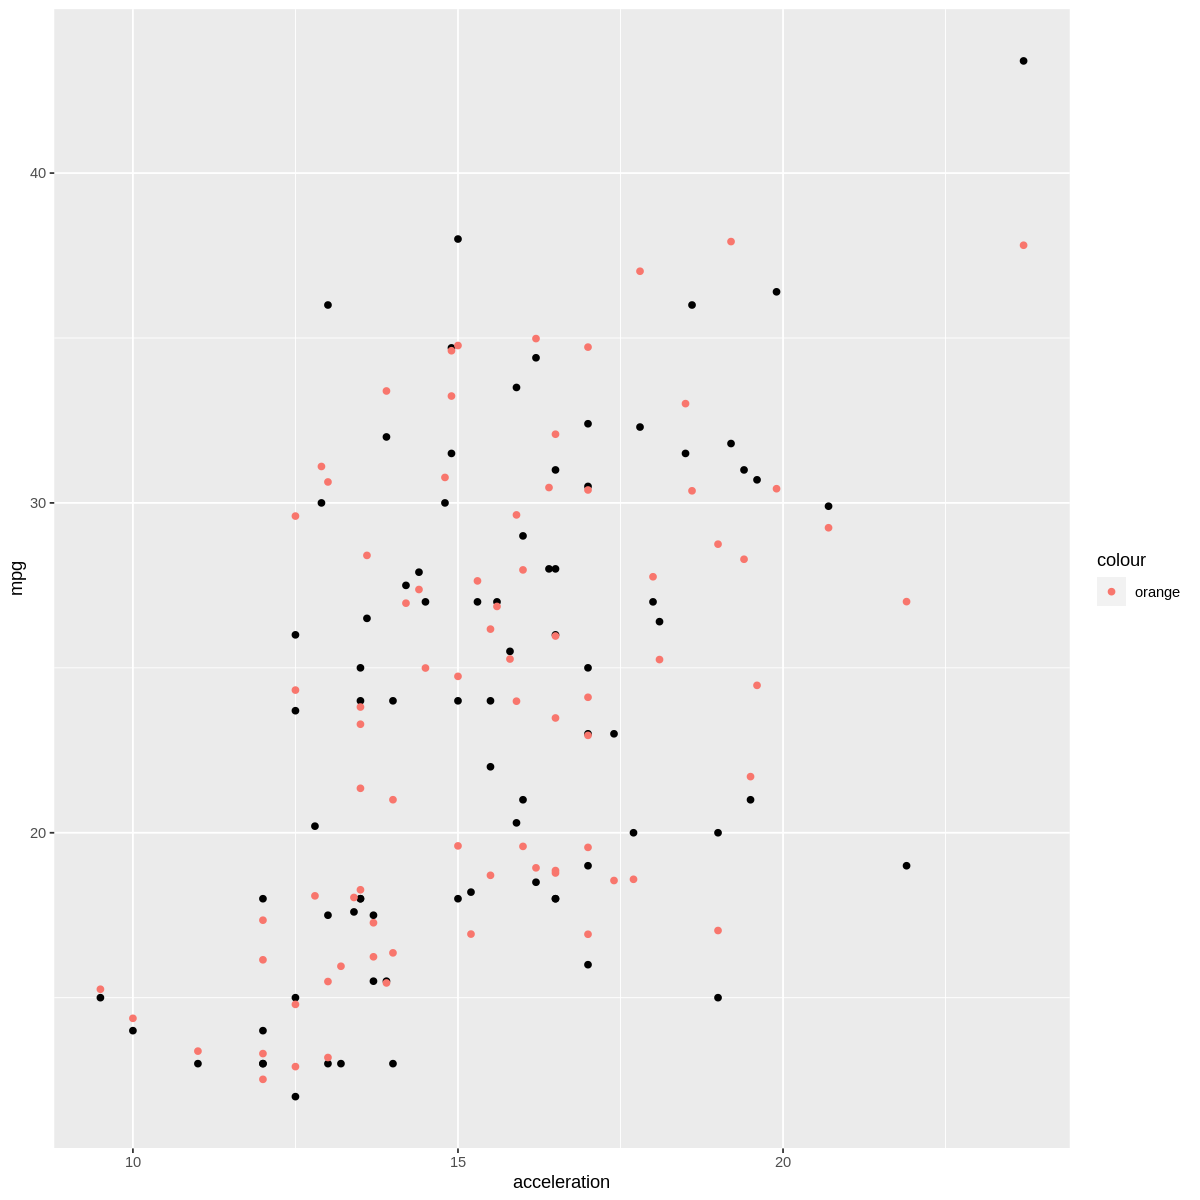

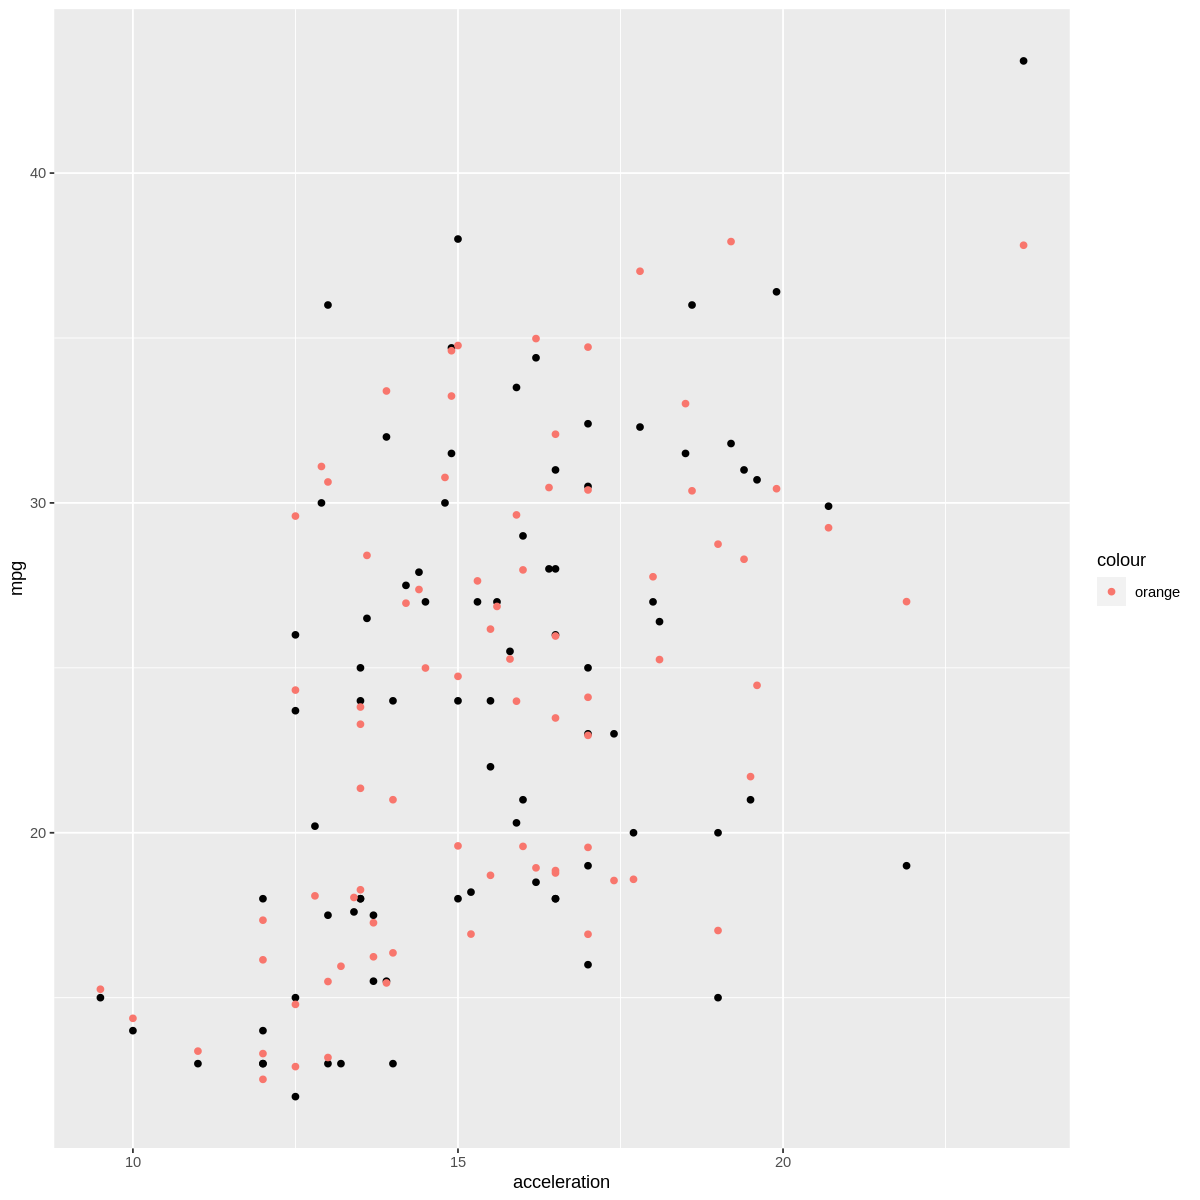

In [13]:
for (j in list(1, 10, 25, 50, 100, 250)) {
  workflow = workflow %>%
      workflows::update_model(model %>%
      parsnip::set_args(neighbors= j))
  trained_model = generics::fit(workflow,data = data_train)
  data_evaluation_temp = generics::augment(trained_model,data_test)
  print(paste0(toString("K="), toString(j)));
  print(yardstick::metrics(data_evaluation_temp,truth=mpg,estimate=.pred));
  print(ggplot2::ggplot(data_evaluation,aes(x=acceleration)) +
      ggplot2::geom_point(aes(y=mpg)) +
      ggplot2::geom_point(aes(y=.pred,color="orange")));
}

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="C{Fh{Pr:8%2lD{EV*aTX">j</variable><variable id="BLc@7E0B7Y3=fus{uzCr">workflow</variable><variable id="j1[qA`}(Fwl{{F_764g+">trained_model</variable><variable id="haMDnc8Uj|EjY^608!;]">workflows</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="2!lGc/1qa(~}v[2[/m/,">data_evaluation_temp</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="|q$XCeTWL%AdgT|]tbnU">data_test</variable><variable id="M8O}^6C_fm;DGZt9!{=e">yardstick</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="controls_forEach" id="b(kJGMv$w7V.3_Zvqv~b" x="-219" y="45"><field name="VAR" id="C{Fh{Pr:8%2lD{EV*aTX">j</field><value name="LIST"><block type="lists_create_with" id="iKr$=Gh)[))VoiCU,V;^"><mutation items="6"></mutation><value name="ADD0"><block type="math_number" id="Fpu*BNZtIa;g-WSSCcB["><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id="b_0$;Mb7~rGZ*I,U%3y9"><field name="NUM">10</field></block></value><value name="ADD2"><block type="math_number" id="N1O4=j6HxgyLQor6aHXx"><field name="NUM">25</field></block></value><value name="ADD3"><block type="math_number" id="),Ae7.D4QUa|;T_JAi|W"><field name="NUM">50</field></block></value><value name="ADD4"><block type="math_number" id="RMK~VIcaw|p?C)AZuSm|"><field name="NUM">100</field></block></value><value name="ADD5"><block type="math_number" id="lJb?HXW/xn)(=$Gz$P%`"><field name="NUM">250</field></block></value></block></value><statement name="DO"><block type="variables_set" id="iAXV:^yL4/lXHXq9-fWq"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field><value name="VALUE"><block type="pipe_R" id="Oc60%_2o@.oLe%Y#3?BI"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="DLhYW=bspAQ$a:^k%4!`"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="uerg~4,OSsOP%Q_GMx!W"><mutation items="1"></mutation><field name="VAR" id="haMDnc8Uj|EjY^608!;]">workflows</field><field name="MEMBER">update_model</field><data>workflows:update_model</data><value name="ADD0"><block type="pipe_R" id="dK6uw^Hhg9CGa{i{SQ~^"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="5ov`s@{`nDAa=Wa:Vf#6"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id=":WqVq}BLn3,_t/G*_.cZ"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_args</field><data>parsnip:set_args</data><value name="ADD0"><block type="valueOutputCodeBlock_R" id=",Tuj|s}2Ud/1bxaP{a~@"><field name="CODE">neighbors=</field><value name="INPUT"><block type="variables_get" id="FG%1o+Wf5p`Jasul%]Ez"><field name="VAR" id="C{Fh{Pr:8%2lD{EV*aTX">j</field></block></value></block></value></block></value></block></value></block></value></block></value><next><block type="variables_set" id="JYRrWzO%n`MVx/]/0-U="><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field><value name="VALUE"><block type="varDoMethod_R" id="G;Ti7zT)NN:K~,?6G@Sc"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">fit</field><data>generics:fit</data><value name="ADD0"><block type="variables_get" id="UQ+4F`M!L]%Rl`2JZ/|*"><field name="VAR" id="BLc@7E0B7Y3=fus{uzCr">workflow</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="qT3l1#t])/i6SVL5ySZ;"><field name="CODE">data = data_train</field></block></value></block></value><next><block type="variables_set" id="z/]sC~wH!VR}a(%+(PXm"><field name="VAR" id="2!lGc/1qa(~}v[2[/m/,">data_evaluation_temp</field><value name="VALUE"><block type="varDoMethod_R" id="|[aMty9a1zM-r38ib2SG"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="spXY}_4LmBl=DPjUyHvP"><field name="VAR" id="j1[qA`}(Fwl{{F_764g+">trained_model</field></block></value><value name="ADD1"><block type="variables_get" id="oBn[u]Jcbrr|y;Gqk%`v"><field name="VAR" id="|q$XCeTWL%AdgT|]tbnU">data_test</field></block></value></block></value><next><block type="text_print" id="?5]Sz%tZbhlO{*__5I3E"><value name="TEXT"><shadow type="text" id="b^jyiP0V}I8+Bh~n9==c"><field name="TEXT">abc</field></shadow><block type="text_join" id="~WmOZ~o9VV1VF(m[0w$X"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="6wUqIxpN!j:_uZPqqaC8"><field name="TEXT">K=</field></block></value><value name="ADD1"><block type="variables_get" id="qe#`L$DT.K}f*?;dM/IH"><field name="VAR" id="C{Fh{Pr:8%2lD{EV*aTX">j</field></block></value></block></value><next><block type="text_print" id="O/FKS)E93R9.OIJCf:I6"><value name="TEXT"><shadow type="text" id="qpafGqI$G[k?+izt2:QF"><field name="TEXT">abc</field></shadow><block type="varDoMethod_R" id="6OvWcYG=VK?91j*_KfQX"><mutation items="3"></mutation><field name="VAR" id="M8O}^6C_fm;DGZt9!{=e">yardstick</field><field name="MEMBER">metrics</field><data>yardstick:metrics</data><value name="ADD0"><block type="variables_get" id="P+GF$-)19]gmQ~=ceT/B"><field name="VAR" id="2!lGc/1qa(~}v[2[/m/,">data_evaluation_temp</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="uoTYO14$guR)nl-~uo,N"><field name="CODE">truth=mpg</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_R" id="u*MtZc0P_A]NotBQ*rxu"><field name="CODE">estimate=.pred</field></block></value></block></value><next><block type="text_print" id="L7co#(4pw.We56IpSDre"><value name="TEXT"><shadow type="text" id="UP+EXrZP5o2nw*m!-FBn"><field name="TEXT">abc</field></shadow><block type="ggplot_plus_R" id="{/V.VJrPgA0%:h|^)T.k"><mutation items="2"></mutation><value name="INPUT"><block type="varDoMethod_R" id="`~^Ph?8u0N(Xja8+GB`8"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="k!snjXy.)oKjUR@b~opz"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="B366wBKOY5.#^B!$FK6L"><field name="CODE">aes(x=acceleration)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="#O~$XG8d,%+W9y}9?E/-"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="cFx)?r=N@eCm!/u~xV8i"><field name="CODE">aes(y=mpg)</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="Cg(7.FKpatn0}30DZ-?@"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="=8eZ{J@:_?eiKJq6!xbS"><field name="CODE">aes(y=.pred,color="orange")</field></block></value></block></value></block></value></block></next></block></next></block></next></block></next></block></next></block></statement></block></xml>

**QUESTION:**

Compare the metrics and the plots. Can you see differences from plot to plot that match the differences in RMSE?

**ANSWER: (click here to edit)**

*No, the differences are too subtle to detect by eye.*

<!--  -->